### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(42)

In [27]:
tf.__version__

'1.15.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [30]:
print('Shape of trainX : {}\nShape of trainY: {}'.format(trainX.shape, trainY.shape))
print('Shape of testX : {}\nShape of testY: {}'.format(testX.shape, testY.shape))

Shape of trainX : (60000, 28, 28)
Shape of trainY: (60000,)
Shape of testX : (10000, 28, 28)
Shape of testY: (10000,)


In [31]:
print('dtype of trainX : {}\ndtype of trainY: {}'.format(trainX.dtype, trainY.dtype))
print('dtype of testX : {}\ndtype of testY: {}'.format(testX.dtype, testY.dtype))

dtype of trainX : uint8
dtype of trainY: uint8
dtype of testX : uint8
dtype of testY: uint8


In [32]:
print(trainY[0:5])

[9 0 0 3 0]


In [33]:
print(testY[0:5])

[9 2 1 1 6]


In [34]:
print(np.unique(testY))

[0 1 2 3 4 5 6 7 8 9]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainlabelsY = trainY
testlabelsY = testY

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [37]:
print('Shape of trainY:', trainY.shape)
print('dtype of trainY:', trainY.dtype)
print('First 5 examples in trainY now are: \n', trainY[0:5])

Shape of trainY: (60000, 10)
dtype of trainY: float32
First 5 examples in trainY now are: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [38]:
print('Shape of testY:', testY.shape)
print('dtype of testY:', testY.dtype)
print('First 5 examples in testY now are:\n', testY[0:5])

Shape of testY: (10000, 10)
dtype of testY: float32
First 5 examples in testY now are:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

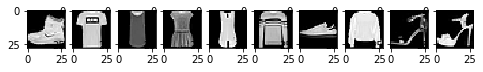

[9 0 0 3 0 2 7 2 5]


In [40]:

plt.figure(figsize=(8, 8))
for i in range(10):    
    plt.subplot(2, 10, i + 1)    
    plt.imshow(trainX[i,:].reshape([28,28]), cmap='gray')
plt.show()
print(trainlabelsY[0:9])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Building a Neural Network without Batch Normalization

#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Reshape input data from 2D to 1D -> 28x28 to 784
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs after applying softmax as we have 10 classes
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model with a cross entropy loss function and sgd optimizer
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


### Execute the model using model.fit()

In [42]:
#Fit the model on trainX,trainY and validate using testX,testY

model1.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 48us/sample - loss: 2055.6271 - acc: 0.7393 - val_loss: 2854.6495 - val_acc: 0.6892
Epoch 2/30
60000/60000 [==============================] - 3s 46us/sample - loss: 1625.1838 - acc: 0.7768 - val_loss: 1316.2704 - val_acc: 0.7890
Epoch 3/30
60000/60000 [==============================] - 3s 47us/sample - loss: 1555.1421 - acc: 0.7862 - val_loss: 1648.6645 - val_acc: 0.7349
Epoch 4/30
60000/60000 [==============================] - 3s 46us/sample - loss: 1566.9990 - acc: 0.7887 - val_loss: 1940.2423 - val_acc: 0.7300
Epoch 5/30
60000/60000 [==============================] - 3s 46us/sample - loss: 1525.6621 - acc: 0.7912 - val_loss: 1657.7487 - val_acc: 0.7841
Epoch 6/30
60000/60000 [==============================] - 3s 46us/sample - loss: 1481.9317 - acc: 0.7954 - val_loss: 1926.4529 - val_acc: 0.7794
Epoch 7/30
60000/60000 [==============================] - 3s 45us/sample - loss:

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Building a Neural Network with Batch Normalization layer

#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape input data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data with BatchNormalization layer
model2.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax as we have 10 classes
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model with a cross entropy loss function and sgd optimizer
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [44]:
#Fit the model on trainX,trainY and validate using testX,testY

model2.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5995 - acc: 0.7923 - val_loss: 0.5166 - val_acc: 0.8221
Epoch 2/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4891 - acc: 0.8311 - val_loss: 0.4834 - val_acc: 0.8311
Epoch 3/30
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4689 - acc: 0.8372 - val_loss: 0.4754 - val_acc: 0.8325
Epoch 4/30
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4561 - acc: 0.8427 - val_loss: 0.4739 - val_acc: 0.8357
Epoch 5/30
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4490 - acc: 0.8433 - val_loss: 0.4643 - val_acc: 0.8381
Epoch 6/30
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4465 - acc: 0.8453 - val_loss: 0.4725 - val_acc: 0.8337
Epoch 7/30
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4397 - acc: 0.8474 - val_loss: 0.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Build a Neural Network with learning rate set to 0.001 in sgd optimizer

#Initialize Sequential model
model3 = tf.keras.models.Sequential()

#Reshape input data from 2D to 1D -> 28x28 to 784
model3.add(tf.keras.layers.Reshape((784,), input_shape=(28,28,)))

#Normalize the data with BatchNormalization layer
model3.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax as we have 10 classes
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

#Customize the learning rate to 0.001 in sgd optimizer
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

#Compile the model with a cross entropy loss function and sgd_optimizer with lr=0.001
model3.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [46]:
#Fit the model on trainX,trainY and validate using testX,testY

model3.fit(trainX, trainY, 
           validation_data=(testX,testY),
           epochs=30, 
           batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 66us/sample - loss: 0.9395 - acc: 0.6810 - val_loss: 0.7233 - val_acc: 0.7576
Epoch 2/30
60000/60000 [==============================] - 4s 63us/sample - loss: 0.6527 - acc: 0.7747 - val_loss: 0.6375 - val_acc: 0.7879
Epoch 3/30
60000/60000 [==============================] - 4s 61us/sample - loss: 0.5959 - acc: 0.7952 - val_loss: 0.5828 - val_acc: 0.8009
Epoch 4/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.5628 - acc: 0.8051 - val_loss: 0.5608 - val_acc: 0.8072
Epoch 5/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.5430 - acc: 0.8138 - val_loss: 0.5522 - val_acc: 0.8139
Epoch 6/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.5282 - acc: 0.8179 - val_loss: 0.5417 - val_acc: 0.8169
Epoch 7/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.5163 - acc: 0.8221 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and sigmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Build a Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer
#Use cross entropy loss function and sigmoid as activation in the hidden layers
#Use softmax as activation function in the output layer
#Use sgd optimizer with learning rate 0.03

#Initialize Sequential model
model4 = tf.keras.models.Sequential()

#Reshape input data from 2D to 1D -> 28x28 to 784
model4.add(tf.keras.layers.Reshape(target_shape=(784,), input_shape=(28,28)))

#Normalize the data with BatchNormalization layer()
model4.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer, Hidden Layer 1 with 100 neurons and activation function as sigmoid 
model4.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add Dense Layer, Hidden Layer 2 with 100 neurons and activation function as sigmoid
model4.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add Dense Layer, Hidden Layer 3 with 10 neurons and activation function as sigmoid
model4.add(tf.keras.layers.Dense(10, activation='sigmoid'))

#Add Dense Layer which provides 10 Outputs as we have 10 classes after 3 Hidden layers by applying activation function as softmax 
model4.add(tf.keras.layers.Dense(10, activation='softmax'))


### Compile the model

In [0]:
#Use cross entropy loss function
#Use sgd optimizer with learning rate 0.03

sgd_optimizer2 = tf.keras.optimizers.SGD(learning_rate=0.03)
model4.compile(optimizer=sgd_optimizer2, loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [49]:
#Fit the model on trainX,trainY and validate using testX,testY

model4.fit(trainX, trainY,
           validation_data=(testX, testY),
           epochs=30,
           batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 94us/sample - loss: 1.8242 - acc: 0.4076 - val_loss: 1.3360 - val_acc: 0.6290
Epoch 2/30
60000/60000 [==============================] - 5s 88us/sample - loss: 1.0853 - acc: 0.6483 - val_loss: 0.8786 - val_acc: 0.7220
Epoch 3/30
60000/60000 [==============================] - 5s 89us/sample - loss: 0.7865 - acc: 0.7376 - val_loss: 0.6891 - val_acc: 0.7689
Epoch 4/30
60000/60000 [==============================] - 5s 88us/sample - loss: 0.6628 - acc: 0.7712 - val_loss: 0.6096 - val_acc: 0.7890
Epoch 5/30
60000/60000 [==============================] - 5s 87us/sample - loss: 0.5975 - acc: 0.7934 - val_loss: 0.5580 - val_acc: 0.8082
Epoch 6/30
60000/60000 [==============================] - 5s 87us/sample - loss: 0.5479 - acc: 0.8141 - val_loss: 0.5222 - val_acc: 0.8223
Epoch 7/30
60000/60000 [==============================] - 5s 85us/sample - loss: 0.5104 - acc: 0.8270 - val_loss: 0.

## Review model

In [50]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 784)               3136      
_________________________________________________________________
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
Total params: 92,856
Trainable params: 91,288
Non-trainable params: 1,568
______________________________________________

In [0]:
all_weights= model4.get_weights()

### Run the model

In [52]:
input_data = np.expand_dims(testX[0], axis=0)
input_data.shape

(1, 28, 28)

In [59]:
pred = model4.predict(input_data)
pred

array([[4.23548263e-05, 4.15228969e-05, 1.02841376e-07, 1.27672974e-03,
        6.14521059e-06, 2.28528469e-03, 1.02528793e-05, 1.22581720e-02,
        9.91950859e-04, 9.83087480e-01]], dtype=float32)

In [60]:
pred.shape

(1, 10)

In [61]:
pred[0]

array([4.23548263e-05, 4.15228969e-05, 1.02841376e-07, 1.27672974e-03,
       6.14521059e-06, 2.28528469e-03, 1.02528793e-05, 1.22581720e-02,
       9.91950859e-04, 9.83087480e-01], dtype=float32)

In [62]:
np.argmax(pred[0])

9

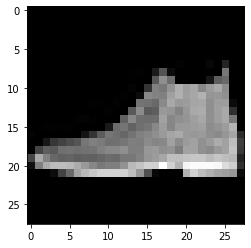

In [64]:
#Plot the image
plt.imshow(testX[0],cmap='gray')
plt.show()

In [65]:
np.argmax(testY[0])

9